# From GeoJSON to Shapefile
The notebook will cover the process of calculating a `Shapefile` based on a `GeoJSON` containing all districts of Munich (and not the city as a whole entity). In particular, the inner borders or shared borders between districts are removed.

Since I also need a version of Munich's border with <500 vertives for USGS Earth Explorer (it only accepts Polygons with <500 vertices), I will also calculate a downsampled version of geopolygon resembling Munich.

## 1. Load the GeoJSON of Munich's districts

In [1]:
import geopandas as gpd

#import argparse
#parser = argparse.ArgumentParser("districts2city")
#parser.add_argument("geojson",
#                    help="GeoJSON file for district merging",
#                    type=str)
#args = parser.parse_args()

gdf = gpd.read_file('Munich-Districts.json')
gdf

,id,objectid,x,y,sb_nummer,name,flaeche_qm,geometry
0,vablock_stadtbezirk_opendata.1,15,690462.8434,5.333823e+06,02,Ludwigsvorstadt-Isarvorstadt,4.401651e+06,"POLYGON ((689722.841 5335359.370, 689570.385 5..."
1,vablock_stadtbezirk_opendata.2,10,693837.5958,5.340723e+06,12,Schwabing-Freimann,2.567477e+07,"POLYGON ((694974.912 5345089.521, 694907.447 5..."
2,vablock_stadtbezirk_opendata.3,9,691525.6042,5.330725e+06,18,Untergiesing-Harlaching,8.057218e+06,"POLYGON ((690447.740 5328289.784, 690497.261 5..."
3,vablock_stadtbezirk_opendata.4,9,691525.6042,5.330725e+06,18,Untergiesing-Harlaching,8.057218e+06,"POLYGON ((691220.643 5333055.074, 691217.702 5..."
4,vablock_stadtbezirk_opendata.5,17,696169.0417,5.337300e+06,13,Bogenhausen,2.371296e+07,"POLYGON ((700340.626 5339842.572, 700309.859 5..."
5,vablock_stadtbezirk_opendata.6,19,696426.5439,5.330747e+06,16,Ramersdorf-Perlach,1.989714e+07,"POLYGON ((693542.885 5333396.806, 693542.515 5..."
6,vablock_stadtbezirk_opendata.7,16,690746.7901,5.335985e+06,03,Maxvorstadt,4.298192e+06,"POLYGON ((690674.877 5336921.715, 690657.282 5..."
7,vablock_stadtbezirk_opendata.8,14,686261.2808,5.334391e+06,25,Laim,5.286015e+06,"POLYGON ((685647.268 5335476.679, 685606.425 5..."
8,vablock_stadtbezirk_opendata.9,13,699191.3166,5.333487e+06,15,Trudering-Riem,2.245392e+07,"POLYGON ((698523.625 5337387.299, 698428.438 5..."
9,vablock_stadtbezirk_opendata.10,23,688848.7454,5.334533e+06,08,Schwanthalerhöhe,2.070313e+06,"POLYGON ((689091.353 5335270.960, 688991.703 5..."


Munich has two two small enclaves belonging to _Untergiesing-Harlaching_ and _Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln_. Because the Polygon has to be downsampled to <500 Vertices for the USGS Earth Explorer and the algorithm doesn't work with MultiPolygons only with one single Polygon, these will be removed.
Due to their diminishing small area their contribution can be neglected anyway.

In [2]:
gdf["area"] = gdf.area
city = gdf[["name", "area", "geometry"]]

# Sort the DataFrame based on the 'area' column in ascending order
city_without_exclaves = city.sort_values(by='area')

city_without_exclaves

,name,area,geometry
16,Thalkirchen-Obersendling-Forstenried-Fürstenri...,8.789971e+02,"POLYGON ((685540.466 5327534.649, 685543.410 5..."
2,Untergiesing-Harlaching,6.593539e+03,"POLYGON ((690447.740 5328289.784, 690497.261 5..."
9,Schwanthalerhöhe,2.070313e+06,"POLYGON ((689091.353 5335270.960, 688991.703 5..."
26,Altstadt-Lehel,3.145888e+06,"POLYGON ((692704.770 5336941.154, 692682.921 5..."
22,Sendling,3.938932e+06,"POLYGON ((688743.237 5333793.445, 688732.857 5..."
15,Au-Haidhausen,4.219983e+06,"POLYGON ((693021.981 5335306.773, 693021.084 5..."
6,Maxvorstadt,4.298192e+06,"POLYGON ((690674.877 5336921.715, 690657.282 5..."
10,Schwabing-West,4.363287e+06,"POLYGON ((691821.837 5339259.125, 691767.291 5..."
0,Ludwigsvorstadt-Isarvorstadt,4.401651e+06,"POLYGON ((689722.841 5335359.370, 689570.385 5..."
7,Laim,5.286015e+06,"POLYGON ((685647.268 5335476.679, 685606.425 5..."


<Axes: >

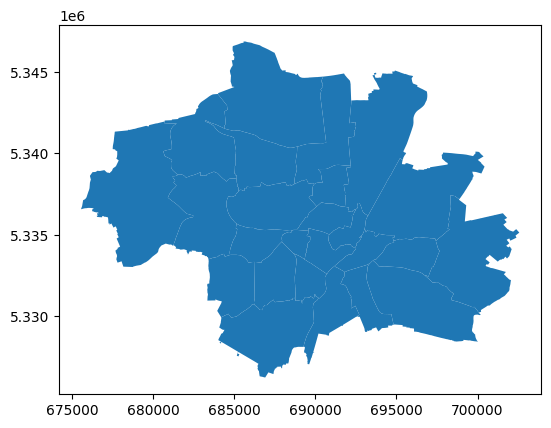

In [3]:
# Drop the rows with the smallest areas (the first two)
city_without_exclaves = city_without_exclaves.iloc[2:]

city_without_exclaves.plot() # Districts clearly visible

## 2. Unify districts to calculate the city boundary

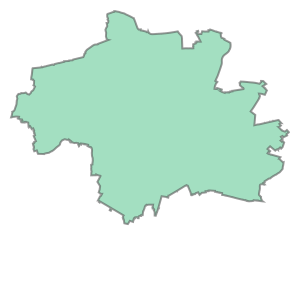

In [4]:
from shapely.ops import unary_union

# Merge all district polygons into one single polygon.
# unary_union() unifys all submitted Polygons, ie. removes duplicates/inner borders
polygons = [poly for poly in city_without_exclaves['geometry']]
munich_poly = unary_union(polygons)
munich_poly

## 3. Downsample the Polygon
USGS Earth Explorer only allows Polygons with < 500 vertices. Since the original one has roughly 4000, we have to downsample it. Luckily, there is `shapely` function: `shapely.simplify()`, the documentation can be found [here](https://shapely.readthedocs.io/en/stable/reference/shapely.simplify.html).

Original number of points: 4146
Downsampled number of points: 486


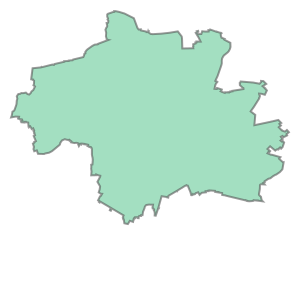

In [5]:
from shapely.geometry import Polygon

def downsample_polygon(polygon, target_points):
    assert type(polygon) == Polygon
    exterior_ring = polygon.exterior # with the exclaves, we had a MultiPolygon which doesn't support the exterior property
    simplified_exterior = exterior_ring.simplify(tolerance=exterior_ring.length / target_points)
    downsampled_polygon = Polygon(simplified_exterior)
    return downsampled_polygon


# Downsample to < 500 vertices
target_points = 7000  # Found by trial and error
munich_downsampled = downsample_polygon(munich_poly, target_points)

print("Original number of points:", len(munich_poly.exterior.coords))
print("Downsampled number of points:", len(munich_downsampled.exterior.coords))

munich_downsampled

## 4. Keep high resolution polygon of Munich's border

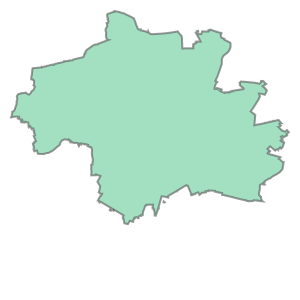

In [6]:
from shapely.geometry import MultiPolygon

munich_mpoly = MultiPolygon([munich_poly, city['geometry'][2], city['geometry'][16]])
munich_mpoly

## 5. Create files (GeoJSON, Shapefile)

### 5.1 Downsampled Munich (without exclaves)

<Axes: >

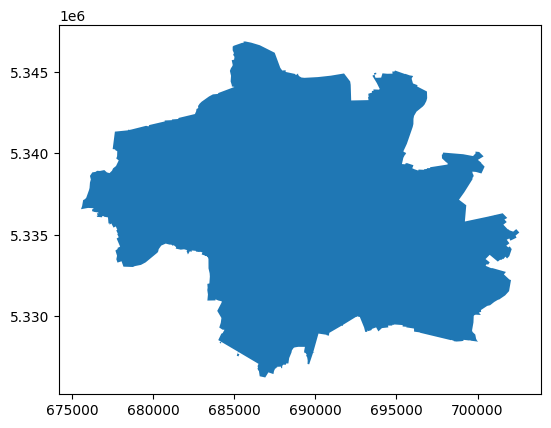

In [7]:
d = {'name': ['München'], 'geometry': munich_downsampled}
mgdf = gpd.GeoDataFrame(d, crs='EPSG:25832')
mgdf.to_file('Munich-downsampled.geojson', driver='GeoJSON')
mgdf.to_file('Munich-downsampled.shp')
mgdf.plot() # No districts visible! :)

### 5.2 High resolution polygon (with exclaves)

<Axes: >

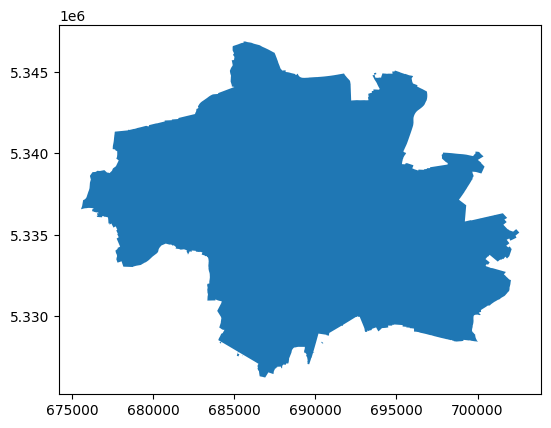

In [8]:
d = {'name': ['München'], 'geometry': munich_mpoly}
mmgdf = gpd.GeoDataFrame(d, crs='EPSG:25832')
mmgdf['flache_qm'] = mmgdf.area
mmgdf.to_file('Munich.geojson', driver='GeoJSON')
mmgdf.plot()